In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/Admin/OneDrive/RTA Dataset.csv")
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

<Axes: >

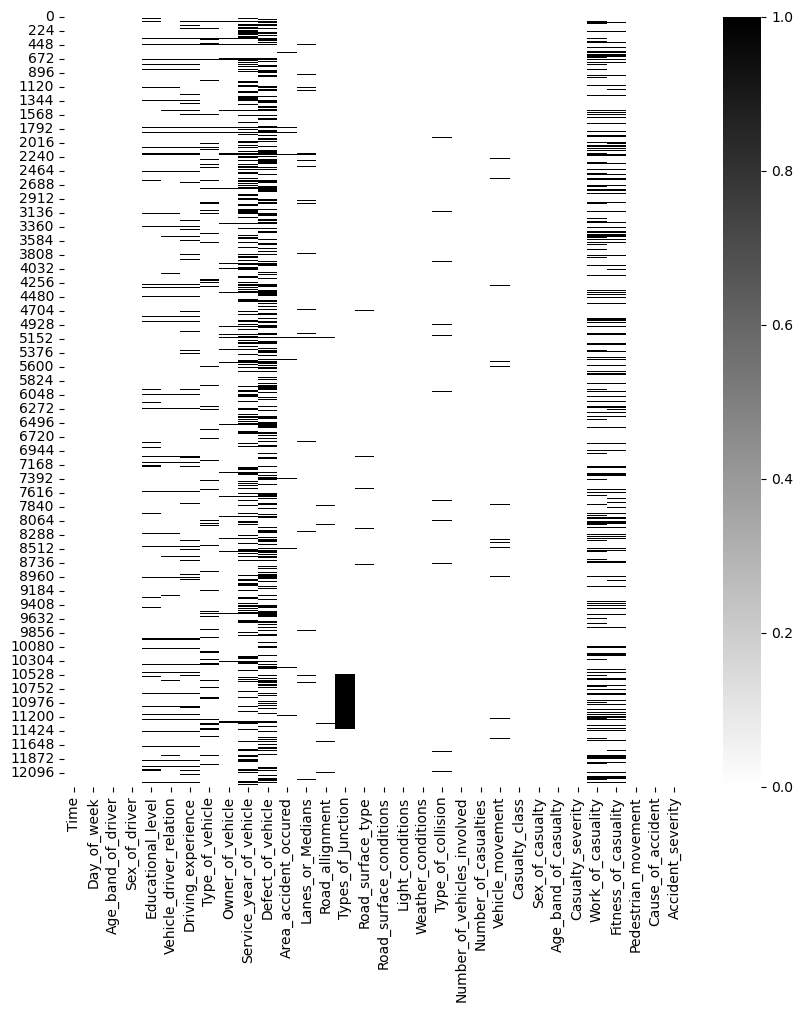

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cmap='binary')

In [6]:
cols = []
per = []
miss_val_col = []

for col in df.columns:
    cols.append(col)
    pert = (df[col].isnull().sum()/df.shape[0])*100
    per.append(pert)
    if df[col].isnull().sum() > 0:
        miss_val_col.append(col)
df_null_pert = pd.DataFrame({"columns" : cols, "Percentage" : per})
df_null_pert

,columns,Percentage
0,Time,0.000000
1,Day_of_week,0.000000
2,Age_band_of_driver,0.000000
3,Sex_of_driver,0.000000
4,Educational_level,6.016564
5,Vehicle_driver_relation,4.701202
6,Driving_experience,6.731082
7,Type_of_vehicle,7.713543
8,Owner_of_vehicle,3.913608
9,Service_year_of_vehicle,31.893472


In [7]:
miss_val_col

['Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Service_year_of_vehicle',
 'Defect_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Type_of_collision',
 'Vehicle_movement',
 'Work_of_casuality',
 'Fitness_of_casuality']

In [8]:
mask = df_null_pert['Percentage'] >= 20
missing_more_than_20per_col = df_null_pert[mask]['columns'].values
df_null_pert[mask]

,columns,Percentage
9,Service_year_of_vehicle,31.893472
10,Defect_of_vehicle,35.945112
27,Work_of_casuality,25.966223
28,Fitness_of_casuality,21.394933


In [9]:
missing_more_than_20per_col

array(['Service_year_of_vehicle', 'Defect_of_vehicle',
       'Work_of_casuality', 'Fitness_of_casuality'], dtype=object)

In [10]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [11]:
df.describe(include=['O']).T  ## or RTA_Data.describe(include='object')

,count,unique,top,freq
Time,12316,1074,15:30:00,120
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Vehicle_driver_relation,11737,4,Employee,9627
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Service_year_of_vehicle,8388,6,Unknown,2883


In [12]:
df[df.duplicated()]

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity


array([[<Axes: title={'center': 'Number_of_vehicles_involved'}>,
        <Axes: title={'center': 'Number_of_casualties'}>]], dtype=object)

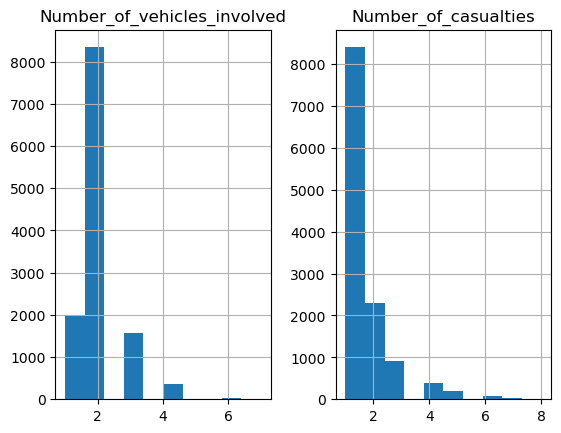

In [13]:
df.hist()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20060\2533021983.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Number_of_vehicles_involved'])


<Axes: xlabel='Number_of_vehicles_involved', ylabel='Density'>

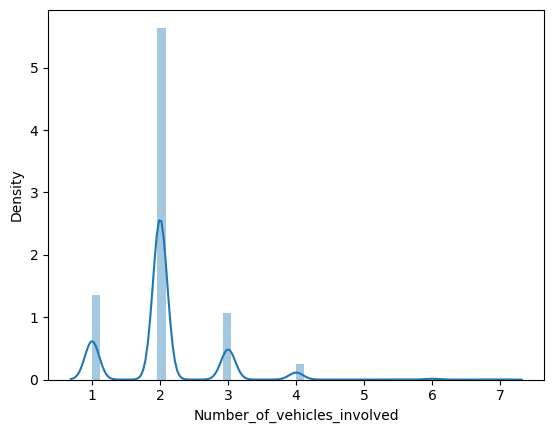

In [14]:
sns.distplot(df['Number_of_vehicles_involved'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_20060\2858543717.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Number_of_casualties'])


<Axes: xlabel='Number_of_casualties', ylabel='Density'>

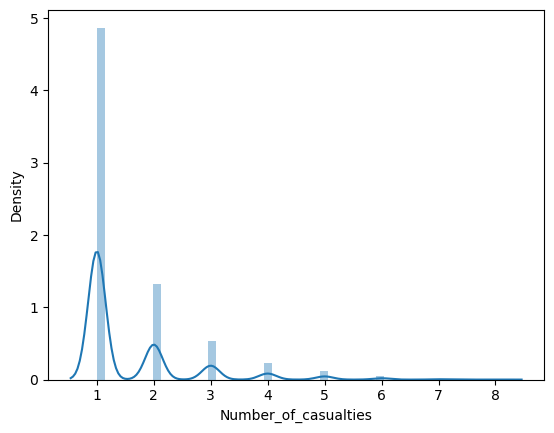

In [15]:
sns.distplot(df['Number_of_casualties'])

In [17]:
def fetchtime(x):
    return(int(x.split(':')[0]))

df['Time'] = df['Time'].apply(fetchtime)
df


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [18]:
def categorizetime(x):
    if x >=6 and x < 18 :
        return('Day')
    elif x < 6 or x >= 18:
        return('Night')
df['Time'] = df['Time'].apply(categorizetime)
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Day,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,Day,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,Day,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Night,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Night,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Day,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,Night,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,Day,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,Day,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [19]:
df['Time'].unique()

array(['Day', 'Night'], dtype=object)

<Axes: xlabel='Time', ylabel='count'>

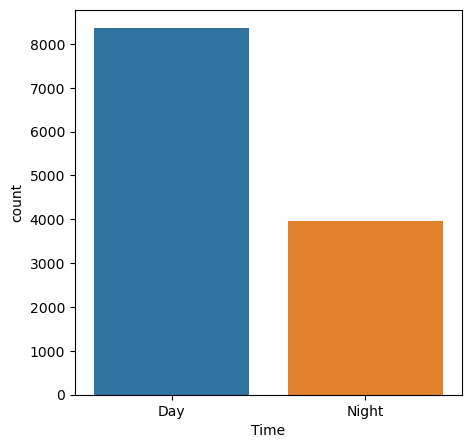

In [20]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Time'])

In [21]:
def catDistribution(col_name):
    print(f"null Value : {df[col_name].isnull().sum()}")
    print(f"Unique values - {df[col_name].unique()}")
    sns.countplot(x=df[col_name])
    plt.xticks(rotation=90);
    plt.show()

null Value : 0
Unique values - ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']


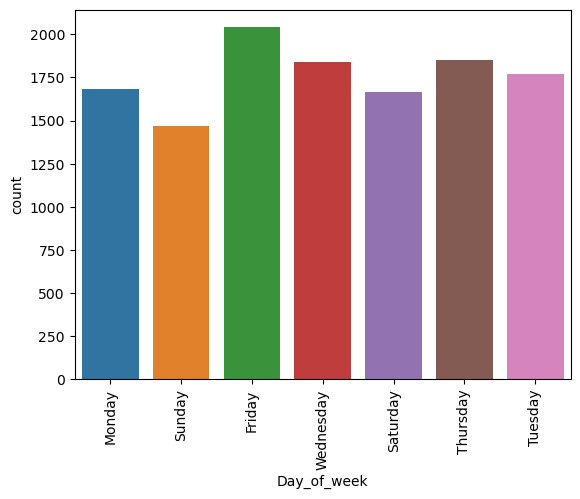

In [22]:
catDistribution('Day_of_week')

In [23]:
cat_col = df.select_dtypes(include='object').columns
cat_col

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

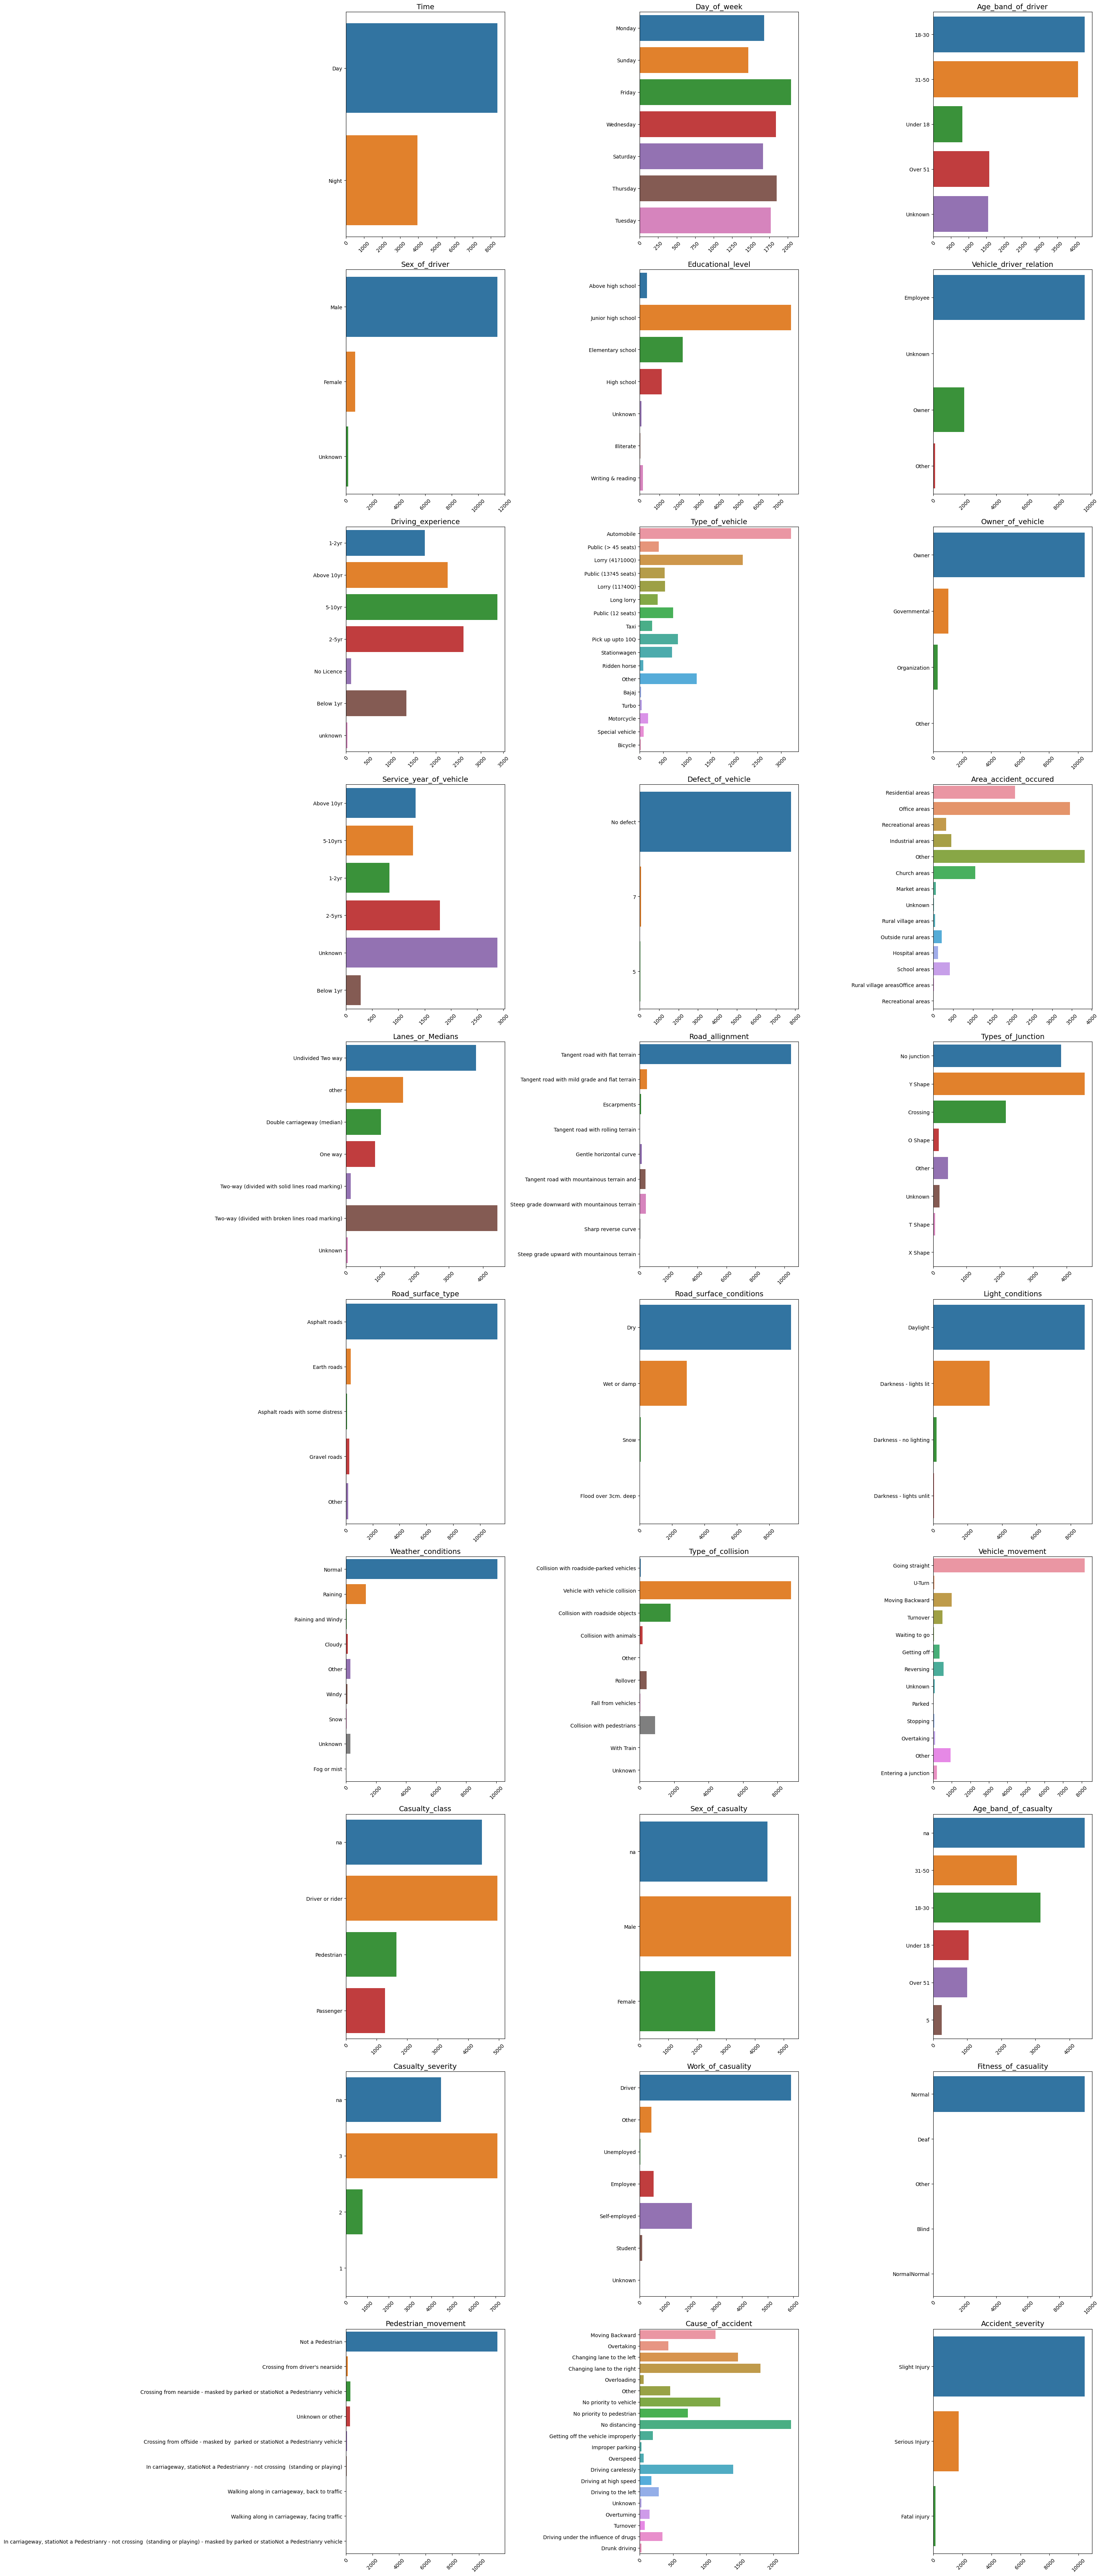

In [24]:
plt.figure(figsize = (30, 70))
for i in enumerate(cat_col):
    plt.subplot(10, 3,i[0]+1,)
    sns.countplot(y=i[1],data = df)
    plt.xticks(rotation = 45)
    plt.title(i[1], fontsize=14)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()

null Value : 0
Unique values - ['Slight Injury' 'Serious Injury' 'Fatal injury']


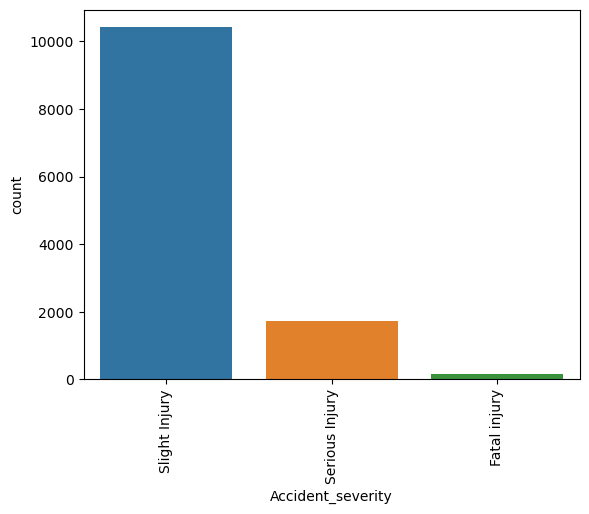

In [25]:
catDistribution('Accident_severity')

In [26]:
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [27]:
num_cols = df.dtypes[df.dtypes == 'int64'].index.tolist()
cat_cols = df.dtypes[df.dtypes != 'int64'].index.tolist()
df[cat_cols]

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Day,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,Day,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,Day,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Night,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Night,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Day,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,Night,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,Day,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,Day,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [28]:
sorted(["Slight Injury", "Serious Injury", "Fatal injury"])

['Fatal injury', 'Serious Injury', 'Slight Injury']

In [29]:
# dropping columns that can cause imbalance while imputation
df.drop(columns = ['Service_year_of_vehicle', 'Defect_of_vehicle','Work_of_casuality', 'Fitness_of_casuality'], inplace=True)

In [30]:
def catFillMissingValueWithMode(df, col):
    df[col].fillna(value=df[col].mode()[0],inplace=True)
    return df

In [31]:
for col in df.columns:
    if df[col].dtype == 'object':
        df = catFillMissingValueWithMode(df,col)

In [32]:
df.isna().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Area_accident_occured        12316 non-null  object
 10  Lanes_or_Medians             12316 non-null  object
 11  Road_allignment              12316 non-null  object
 12  Types_of_Junction            12316 non-null  object
 13  Road_surface_type            12

In [34]:
def ordinal_encoder(df, feats):
  for feat in feats:
    feat_val = list(1+np.arange(df[feat].nunique()))
    feat_key = list(df[feat].sort_values().unique())
    feat_dict = dict(zip(feat_key, feat_val))
    df[feat] = df[feat].map(feat_dict)
  return df

df = ordinal_encoder(df, df.drop(['Accident_severity'], axis=1).columns)
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,1,2,1,2,1,1,1,1,4,10,...,2,2,3,4,3,6,4,6,10,Slight Injury
1,1,2,2,2,5,1,4,12,4,7,...,2,2,3,4,3,6,4,6,17,Slight Injury
2,1,2,1,2,5,1,1,6,4,2,...,2,2,3,1,2,2,3,6,1,Serious Injury
3,2,4,1,2,5,1,3,12,1,7,...,2,2,3,3,1,1,3,6,2,Slight Injury
4,2,4,1,2,5,1,2,1,4,5,...,2,2,3,4,3,6,4,6,17,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,1,7,2,2,5,1,2,5,4,6,...,2,1,3,4,3,6,4,6,11,Slight Injury
12312,2,4,5,2,2,1,3,1,4,6,...,2,1,5,4,3,6,4,6,11,Slight Injury
12313,1,4,3,2,5,1,3,2,4,6,...,1,1,5,1,2,2,3,6,2,Serious Injury
12314,1,4,1,1,5,1,4,6,4,7,...,2,1,5,4,3,6,4,6,6,Slight Injury


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


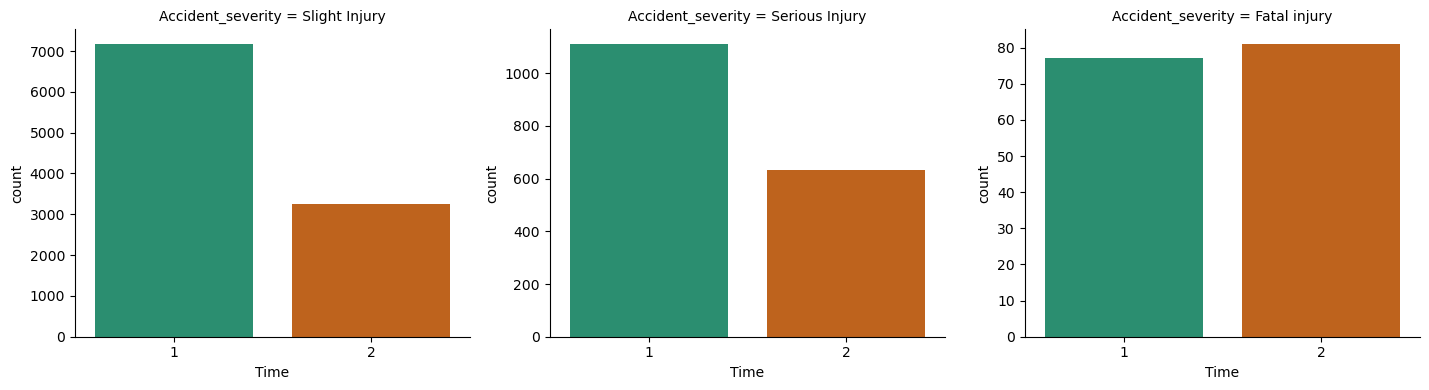

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


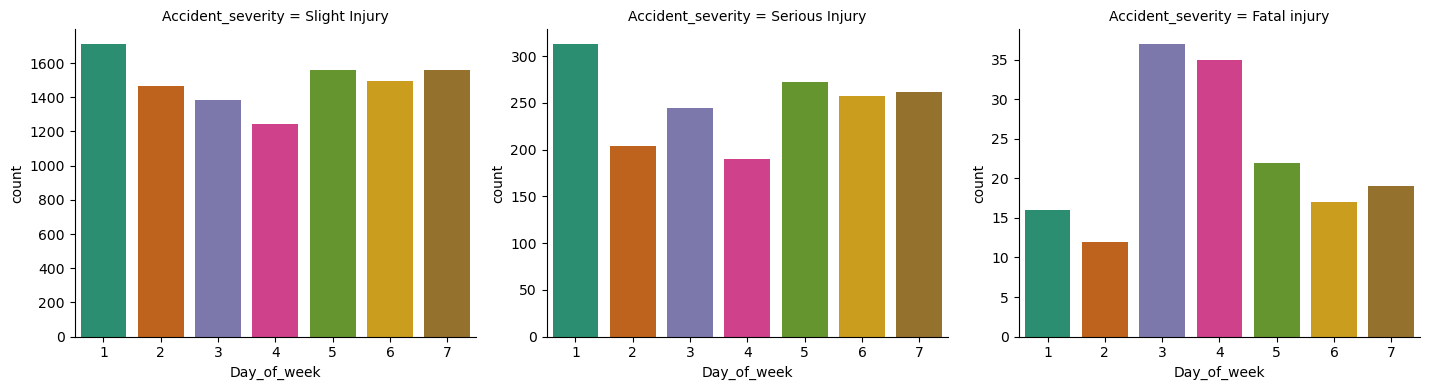

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


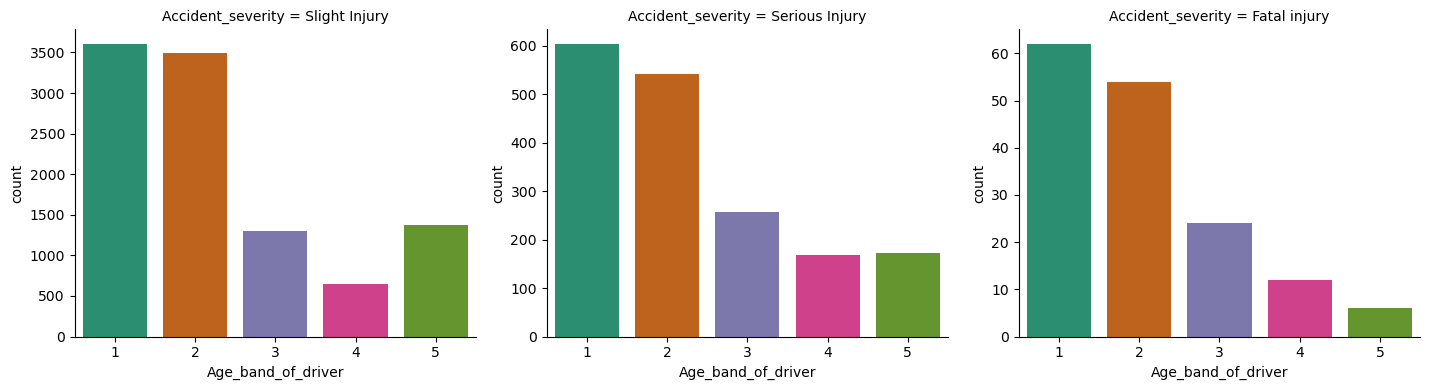

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


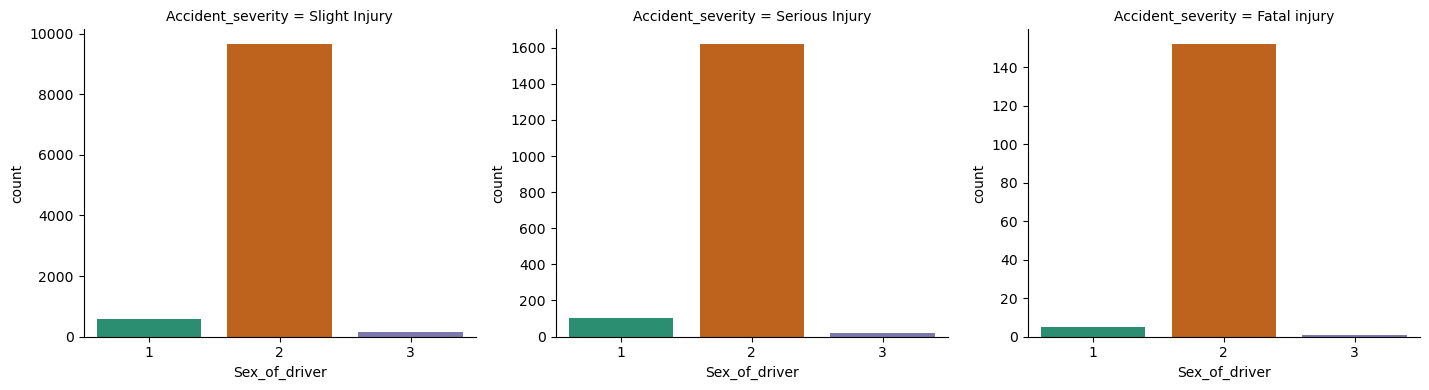

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


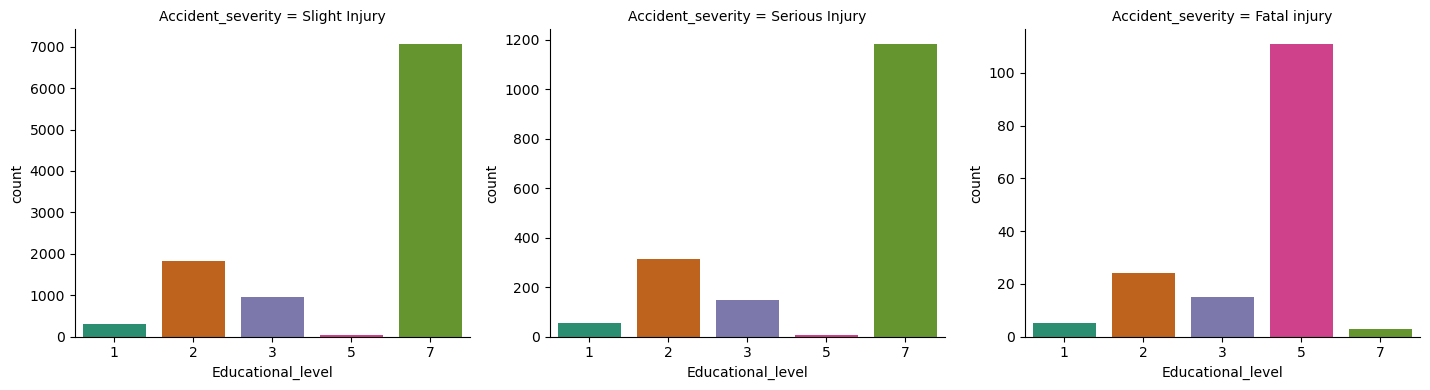

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


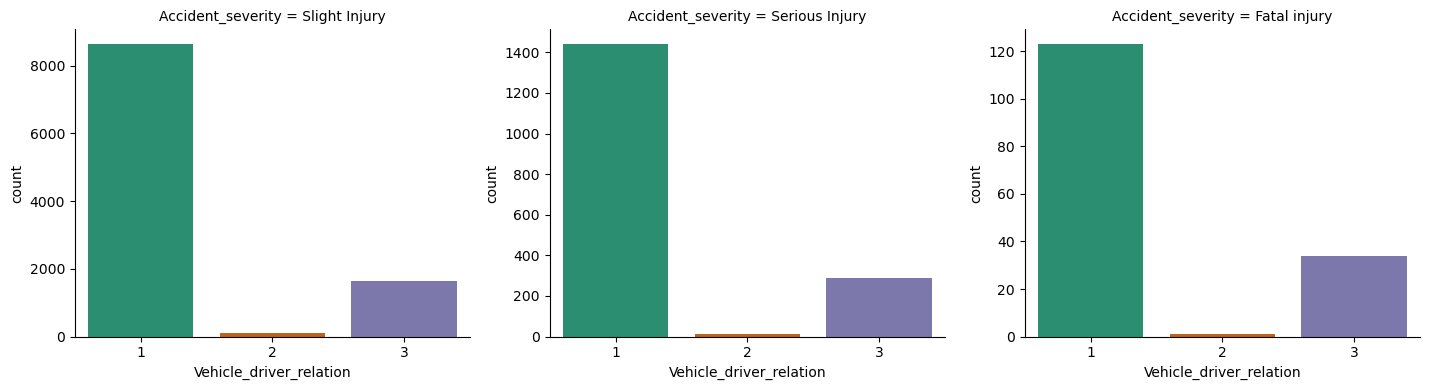

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


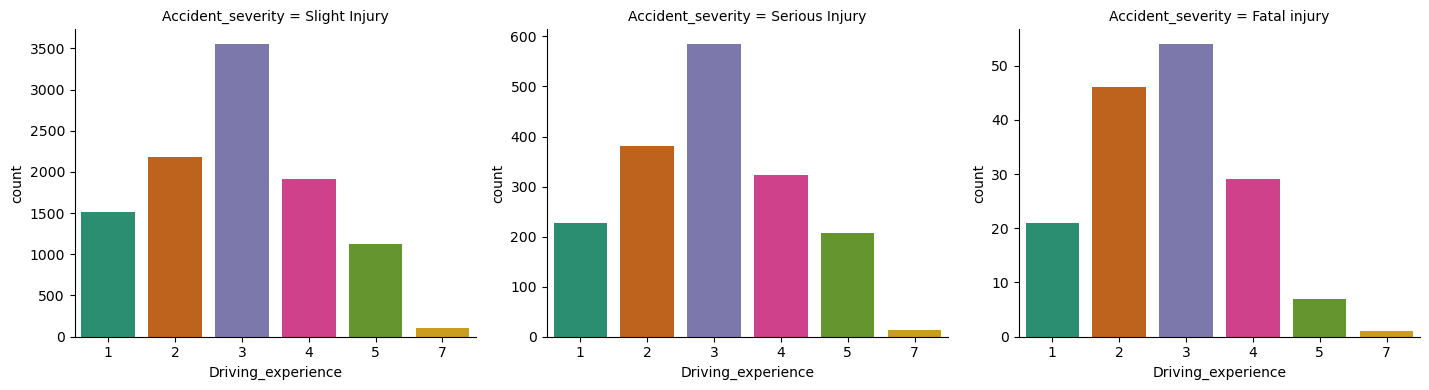

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


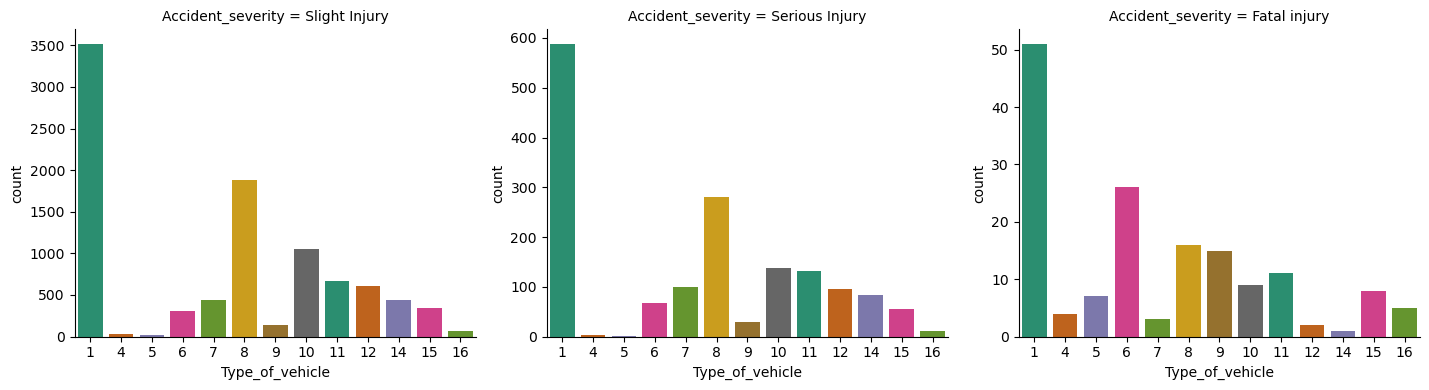

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


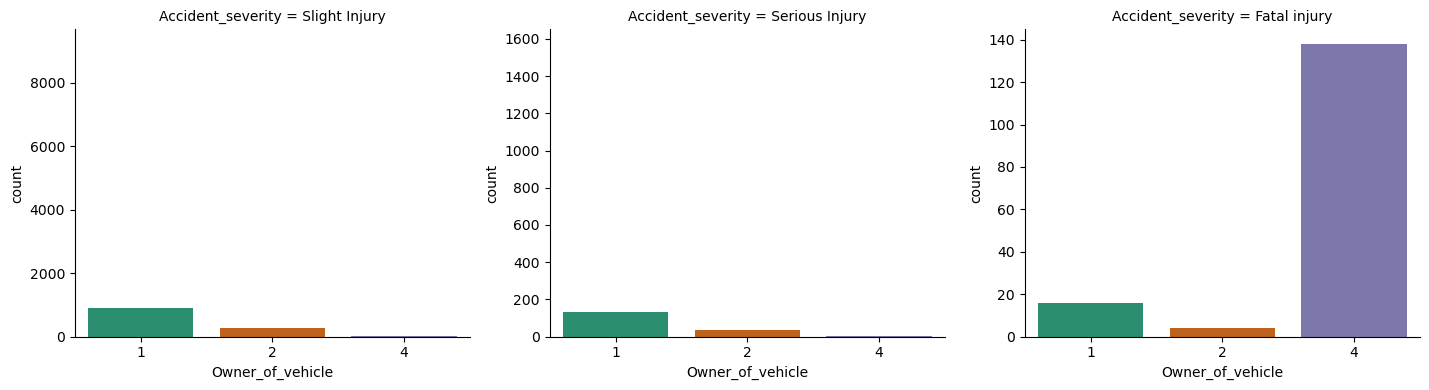

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


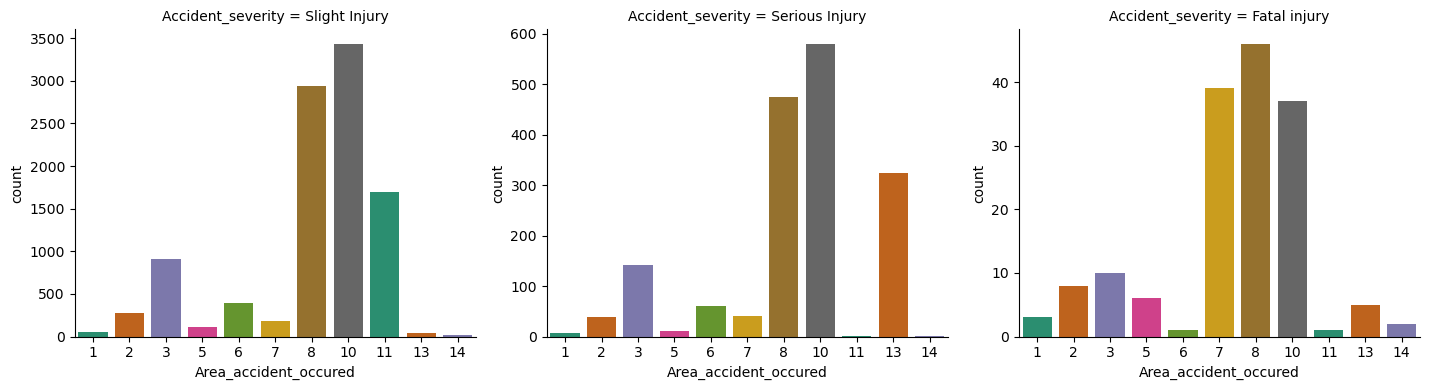

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


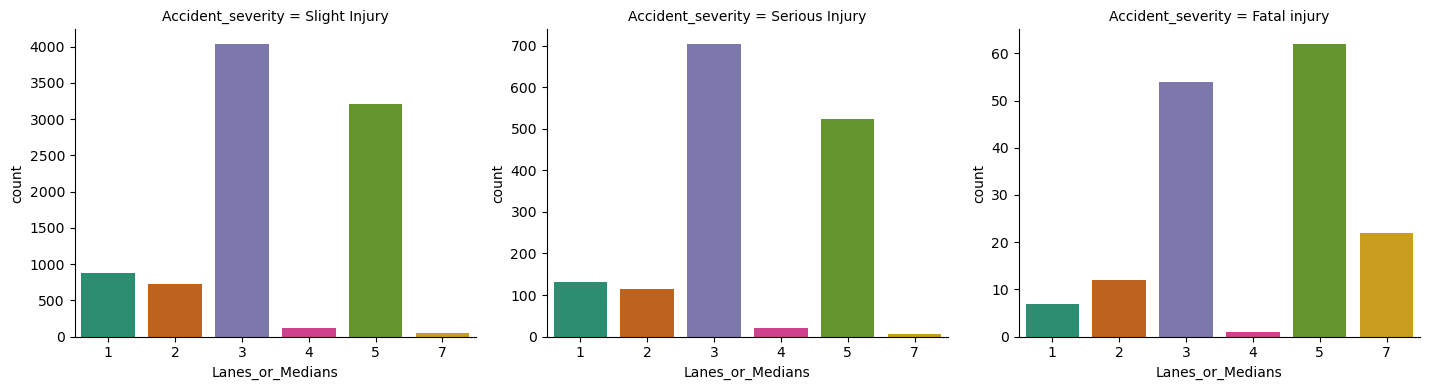

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


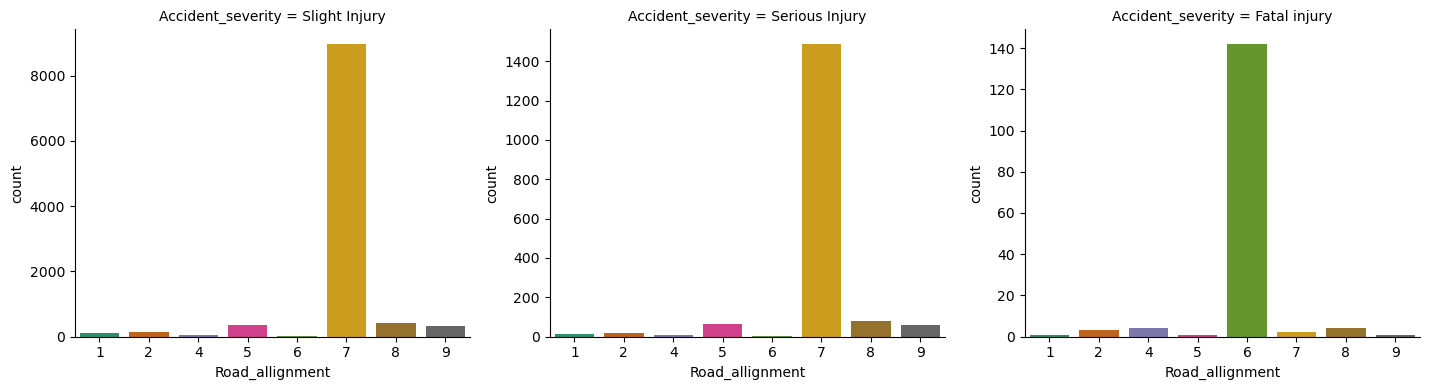

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


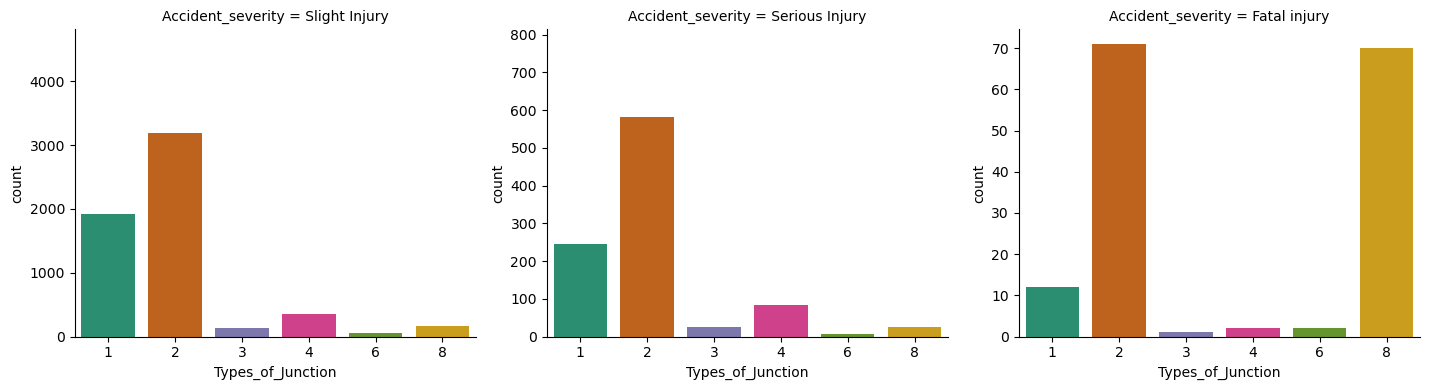

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


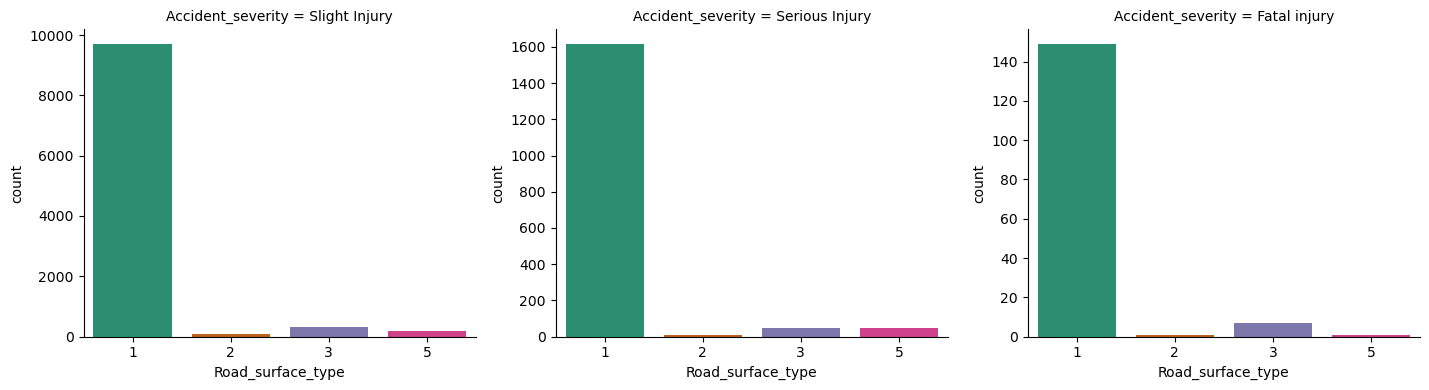

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


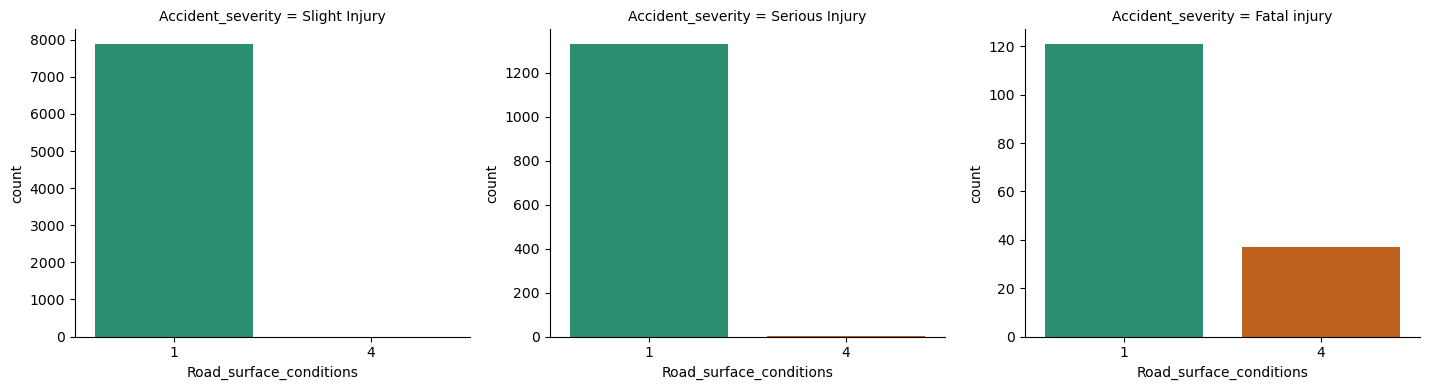

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


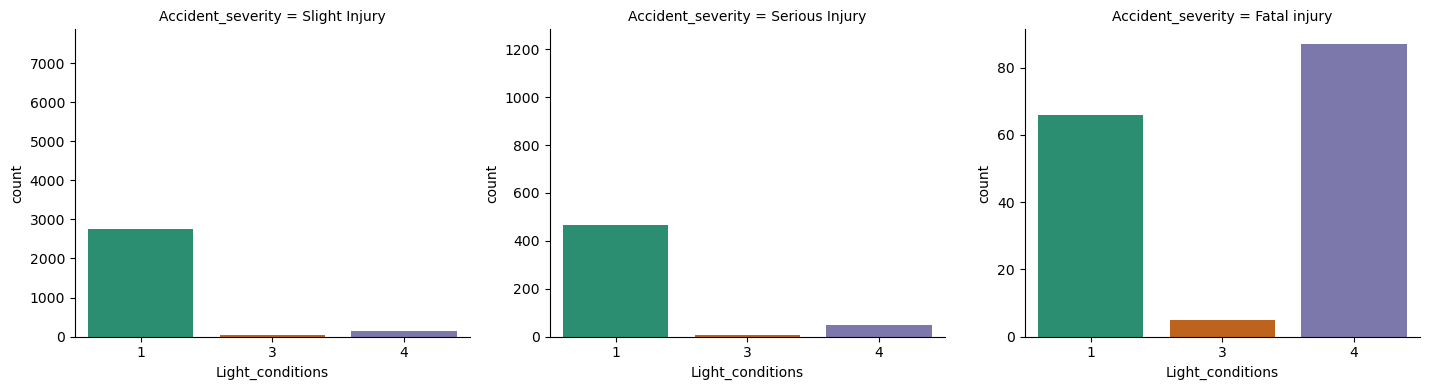

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


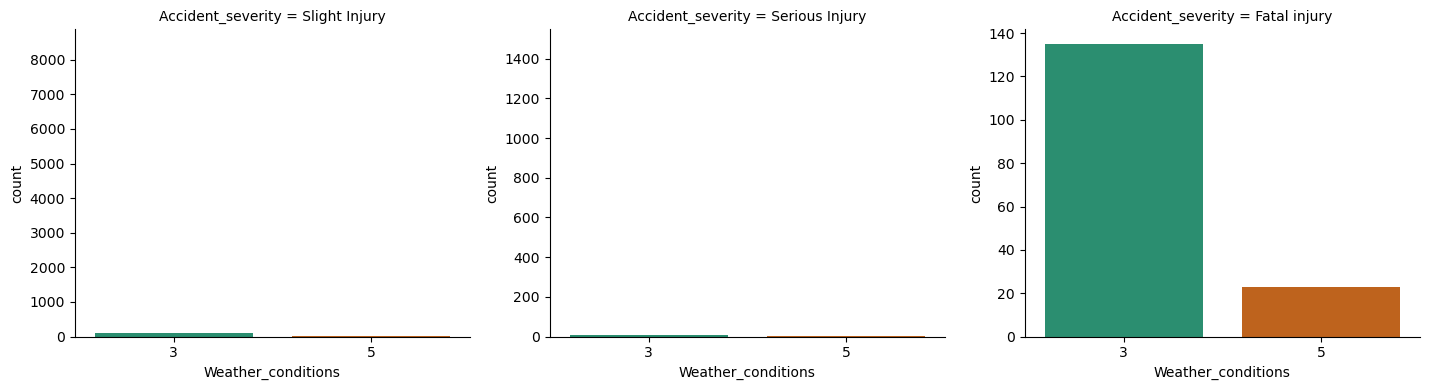

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


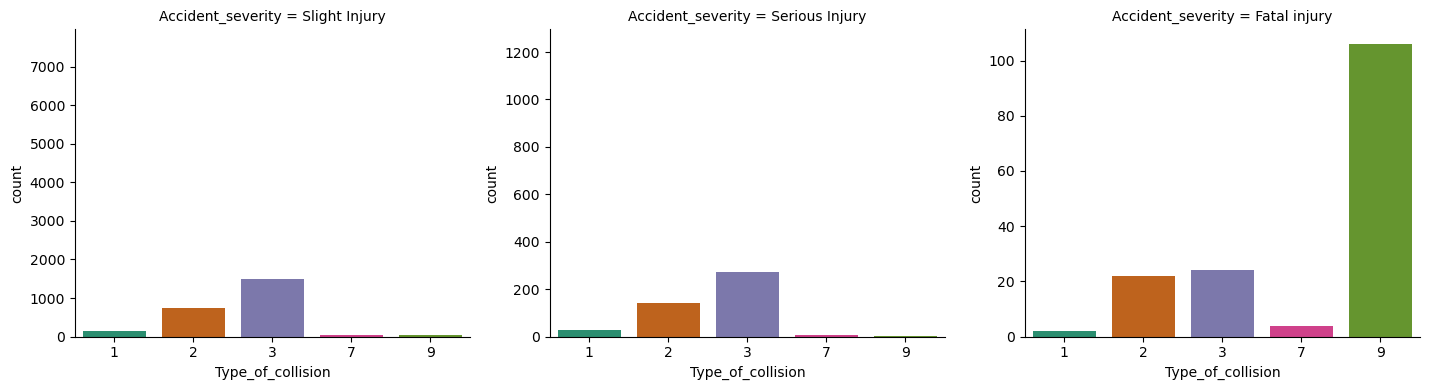

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


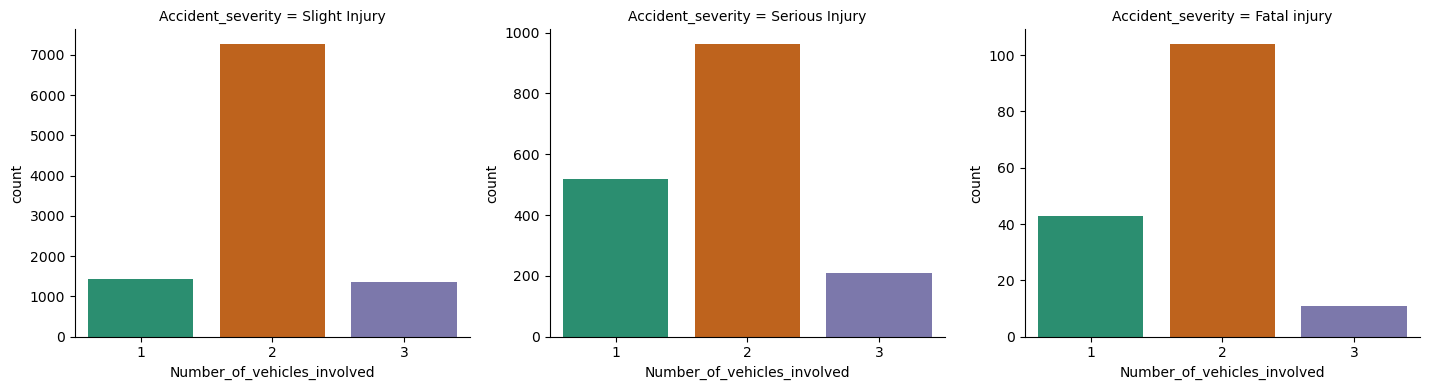

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


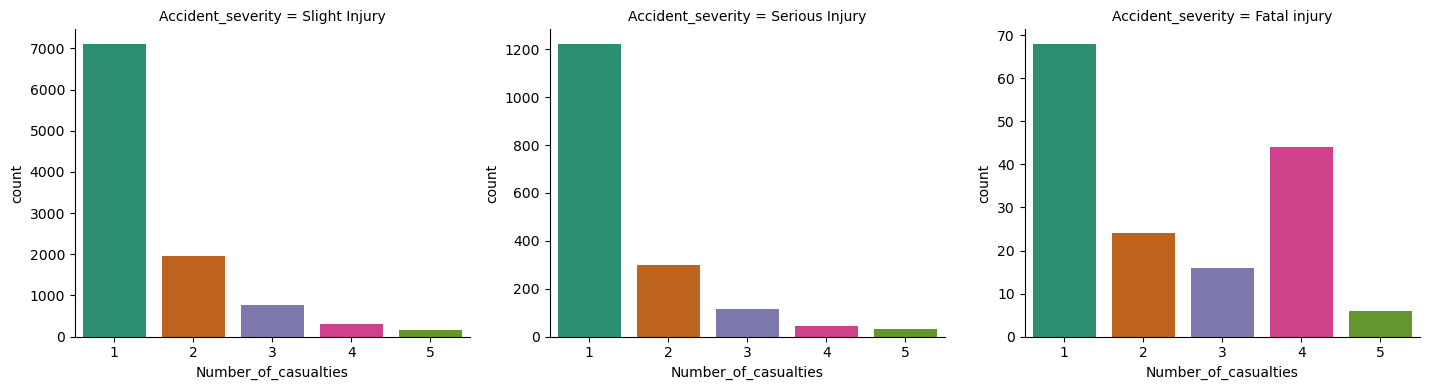

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


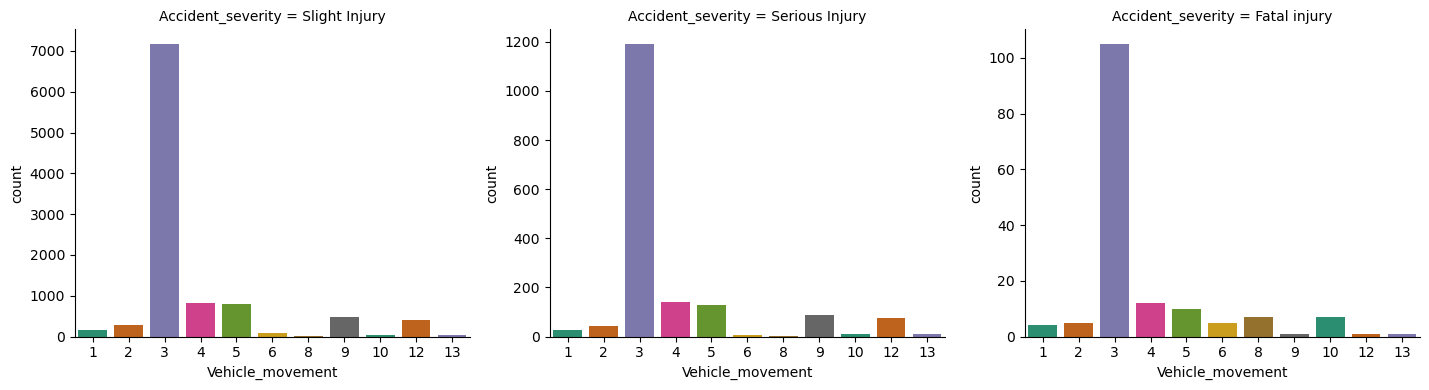

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


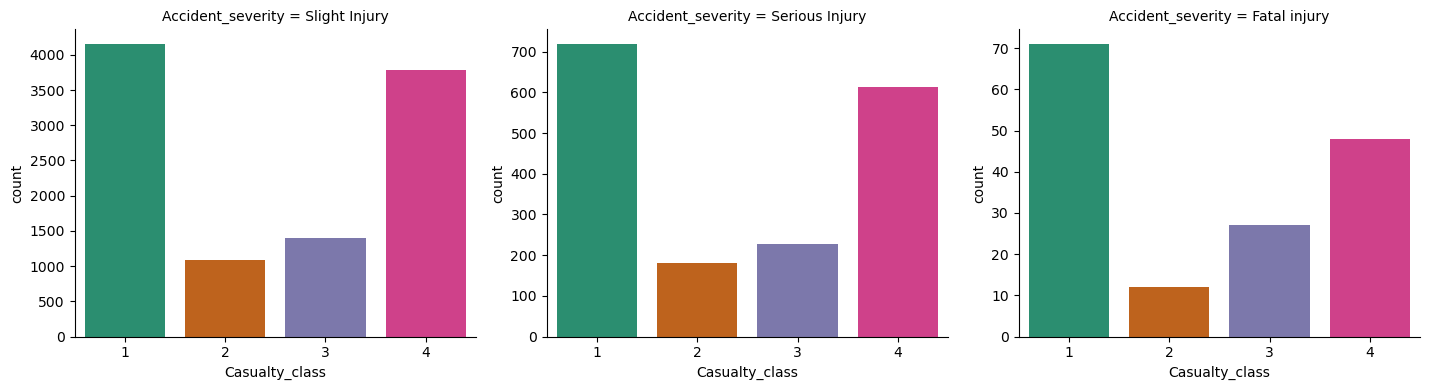

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


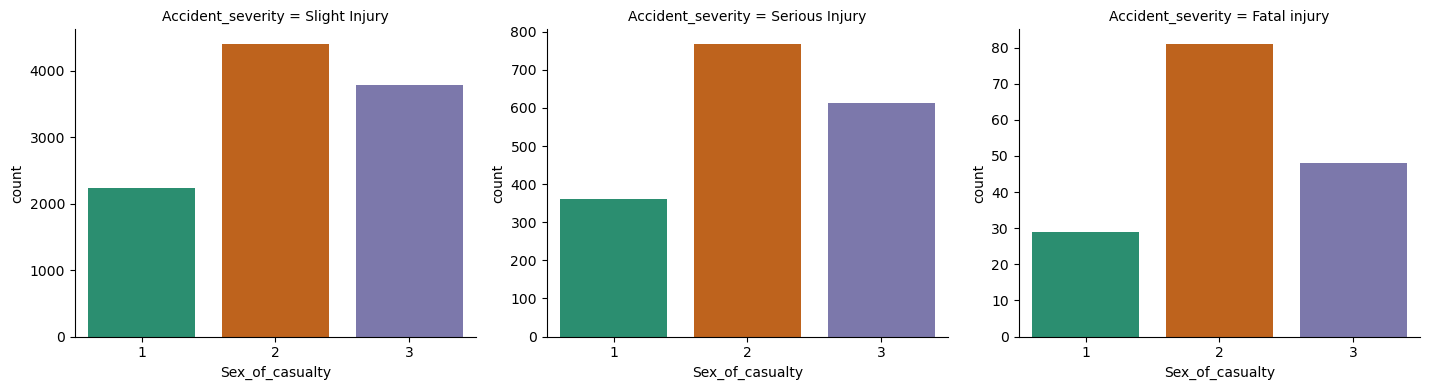

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


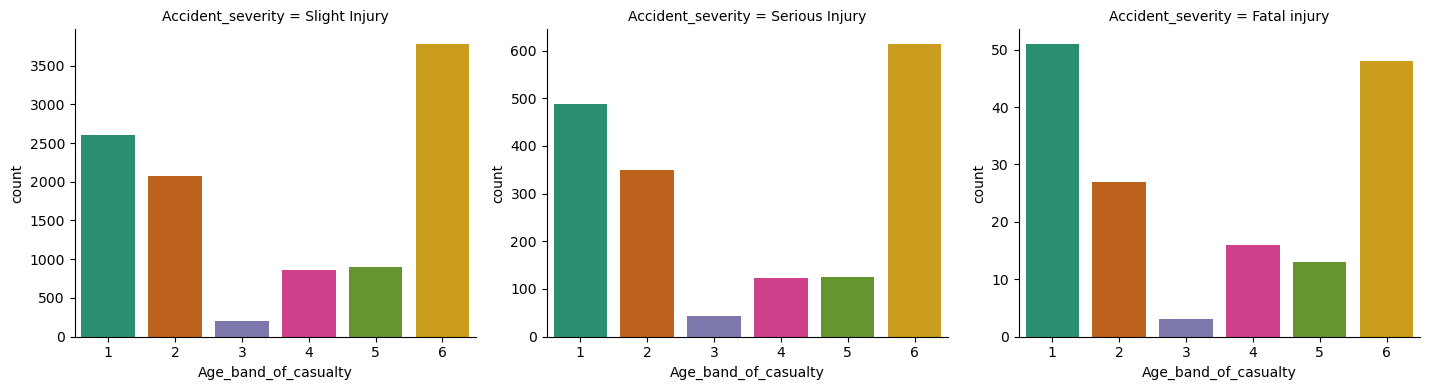

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


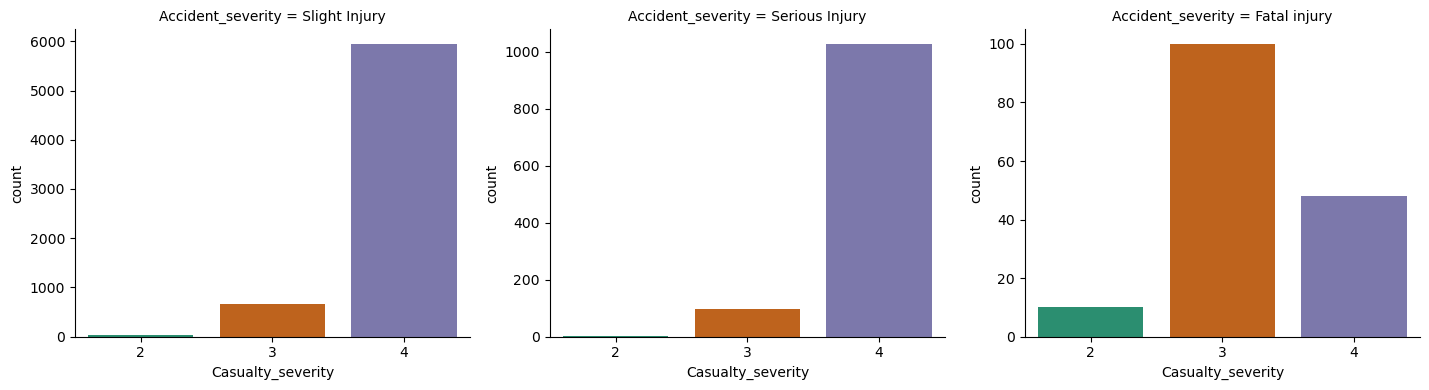

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


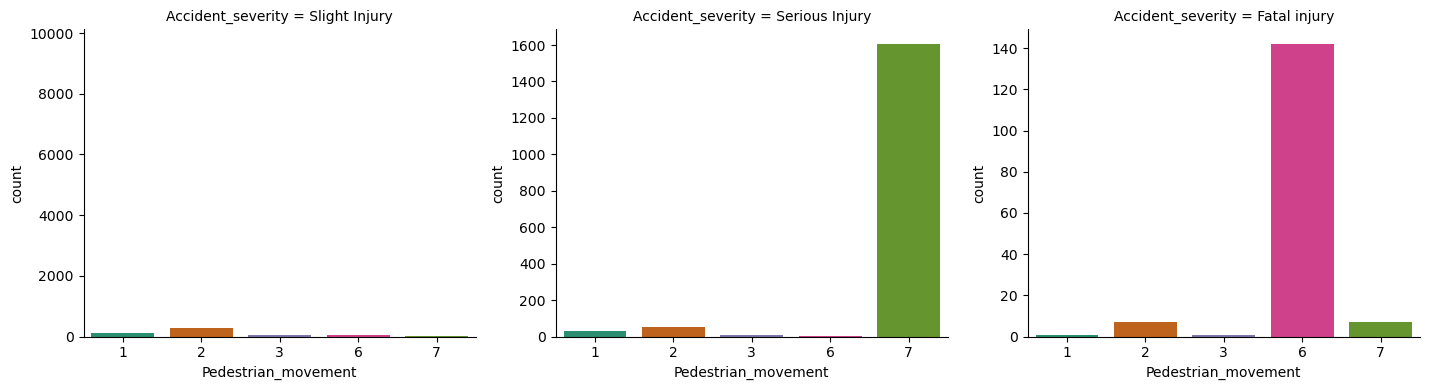

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


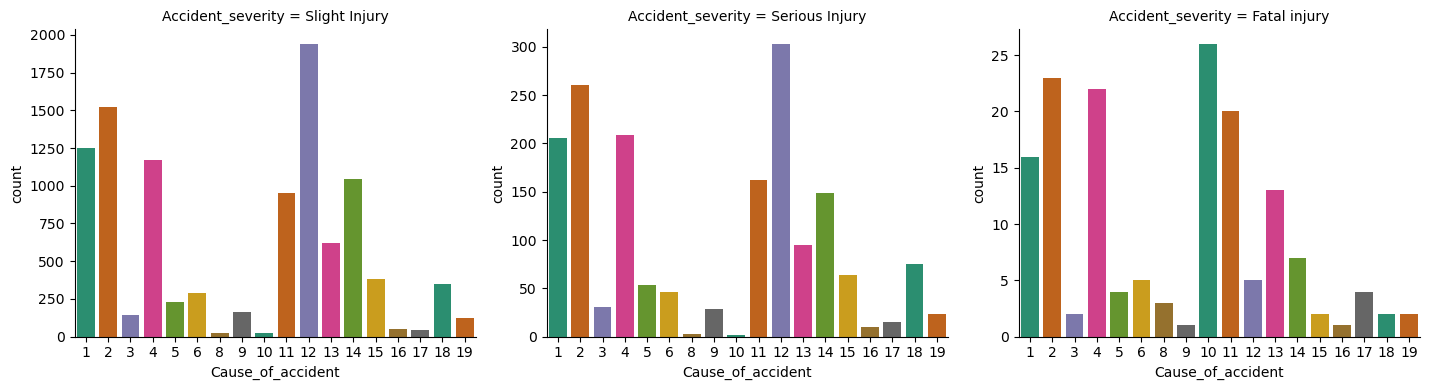

In [35]:
for col in df.drop('Accident_severity', axis=1):
    g = sns.FacetGrid(df, col='Accident_severity', height=4, aspect=1.2, sharey=False)
    g.map(sns.countplot, col, palette = 'Dark2')
    plt.show()

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,12316.0,1.321127,0.466928,1.0,1.0,1.0,2.0,2.0
Day_of_week,12316.0,3.980513,2.059712,1.0,2.0,4.0,6.0,7.0
Age_band_of_driver,12316.0,2.292952,1.337520,1.0,1.0,2.0,3.0,5.0
Sex_of_driver,12316.0,1.957535,0.263767,1.0,2.0,2.0,2.0,3.0
Educational_level,12316.0,4.208347,1.361538,1.0,3.0,5.0,5.0,7.0
Vehicle_driver_relation,12316.0,1.333793,0.741375,1.0,1.0,1.0,1.0,4.0
Driving_experience,12316.0,2.943732,1.236146,1.0,2.0,3.0,4.0,7.0
Type_of_vehicle,12316.0,6.100357,4.548810,1.0,1.0,6.0,9.0,17.0
Owner_of_vehicle,12316.0,3.693975,0.877637,1.0,4.0,4.0,4.0,4.0
Area_accident_occured,12316.0,7.439591,2.349455,1.0,7.0,8.0,8.0,14.0


In [38]:
df.to_csv("RTA_Cleaned_LableEnoded.csv",index=False)

In [39]:
from sklearn.model_selection import train_test_split

X = df.drop(['Accident_severity'],axis=1)
y = df['Accident_severity']

In [40]:
target_class = ['Fatal Injury','Serious Injury', 'Slight Injury']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,stratify=y,random_state=25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 27) (3695, 27) (8621,) (3695,)


Class= Serious Injury, n=1220 (14.15%)
Class= Slight Injury, n=7290 (84.56%)
Class= Fatal injury, n=111 (1.29%)


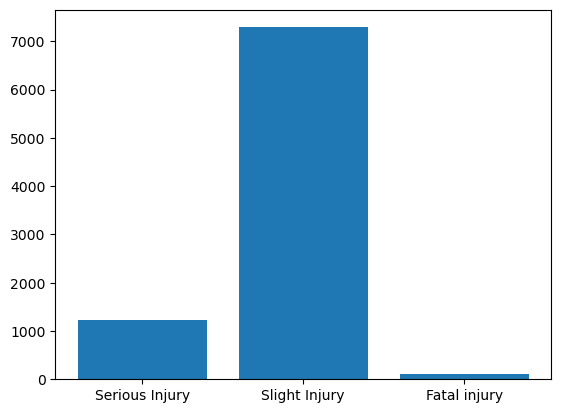

In [42]:
from collections import Counter
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print(f"Class= {k}, n={v} ({per:.2f}%)")
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [51]:
y_test = ordinal_encoder(pd.DataFrame(y_test, columns = ['Accident_severity']), pd.DataFrame(y_test, columns = ['Accident_severity']).columns)['Accident_severity']
y_train = ordinal_encoder(pd.DataFrame(y_train, columns = ['Accident_severity']), pd.DataFrame(y_train, columns = ['Accident_severity']).columns)['Accident_severity']

In [52]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (accuracy_score,
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier


In [53]:
import sklearn
sklearn.__version__

'1.5.0'

In [54]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('Xtree', ExtraTreesClassifier()))
models.append(('ada', AdaBoostClassifier()))
models.append(('gradboost', GradientBoostingClassifier()))
models.append(('XGB', XGBClassifier()))


In [55]:
num_folds = 5
seed = 7
scoring = 'accuracy'


In [56]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, shuffle=True,random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LR: 0.845609 (0.007121)
KNN: 0.828674 (0.007209)
NB: 0.678679 (0.233223)
SVM: 0.845609 (0.007121)
DT: 0.738197 (0.007489)
RF: 0.846885 (0.005960)
Xtree: 0.848393 (0.007328)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramDa

ada: 0.843405 (0.007986)
gradboost: 0.847465 (0.007327)


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\ProgramData\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1440, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [1 2 3]


In [57]:
Rtree = RandomForestClassifier()
Rtree.fit(X_train, y_train)
y_pred = Rtree.predict(X_test)

In [58]:
#Show metrics
def model_evaluation(model,y_test,y_hat):
  Accuracy  =  accuracy_score(y_test, y_hat)
  Precision =  precision_score(y_test, y_pred, average= 'weighted')
  Recall    =  recall_score(y_test, y_pred, average= 'weighted')
  F1_score  =  f1_score(y_test, y_pred, average= 'weighted')
  show_metrics = pd.DataFrame({'Metrics' : ['Accuracy','Precision','Recall','F1_score'],
                               'Score': [Accuracy , Precision, Recall, F1_score]})
  show_metrics = show_metrics
  return show_metrics

In [59]:
model_evaluation(Rtree,y_test,y_pred)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  return result


,Metrics,Score
0,Accuracy,0.848714
1,Precision,0.826051
2,Recall,0.848714
3,F1_score,0.784529


In [60]:
model_evaluation(Rtree,y_test,y_pred)
Rtree.score(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  return result


1.0

In [61]:
Rtree.score(X_test,y_test)

0.8487144790257104

In [62]:
Rtree.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'random_state',
 'ccp_alpha',
 'monotonic_cst')

In [63]:
kf = KFold(n_splits = 5,shuffle=True,random_state=25,).split(X=X_train,y=y_train)
# paramgrid
params = {
    'n_estimators' : range(100,500,100),
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3]
}

rt1 = RandomForestClassifier()

gs1 = GridSearchCV(
    estimator= rt1,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=kf,
    verbose=3,
)

rt_model_1 = gs1.fit(X=X_train, y=y_train)
(gs1.best_params_, gs1.best_score_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 11,
  'min_samples_split': 2,
  'n_estimators': 200},
 0.7791835885670171)

In [64]:
y_pred = rt_model_1.predict(X_test)
model_evaluation(rt_model_1,y_test,y_pred)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  return result


,Metrics,Score
0,Accuracy,0.847903
1,Precision,0.858367
2,Recall,0.847903
3,F1_score,0.780228


In [65]:
kf2 = KFold(n_splits = 5,shuffle=True,random_state=25,).split(X=X_train,y=y_train)
# paramgrid
params = {
    'n_estimators' : range(400,1000,100),
    'max_depth': [15,20],
    'min_samples_split': [2,3],
    'class_weight': ['balanced', None]
}

rt2  = RandomForestClassifier(ccp_alpha=0.0,
                                        criterion='gini',
                                        max_depth=15,
                                        min_samples_split=3,
                                        n_estimators=400)

gs2 = GridSearchCV(
    estimator= rt2,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=kf2,
    verbose=3,
)

rt_model_2 = gs2.fit(X=X_train, y=y_train)
(gs2.best_params_, gs2.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


({'class_weight': None,
  'max_depth': 20,
  'min_samples_split': 2,
  'n_estimators': 800},
 0.7823319537052973)

In [66]:
rt_model_2.score(X_train, y_train)

0.9674426868457502

In [67]:
rt_model_2.score(X_test, y_test)

0.7812132166378022

In [95]:
y_pred = rt_model_2.predict(X_test)

In [69]:
model_evaluation(rt_model_2,y_test,y_pred)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  return result


,Metrics,Score
0,Accuracy,0.847903
1,Precision,0.835095
2,Recall,0.847903
3,F1_score,0.781213


In [70]:
rt3 = RandomForestClassifier(ccp_alpha=0.0,
                                        criterion='gini',
                                        max_depth=35,
                                        min_samples_split=2,
                                        n_estimators=900,
                                       class_weight ='balanced')

rt_model_3 = rt3.fit(X=X_train, y=y_train)


In [71]:
rt_model_3

RandomForestClassifier(class_weight='balanced', max_depth=35, n_estimators=900)

In [72]:
y_pred = rt_model_3.predict(X_train)
model_evaluation(rt_model_3,y_train,y_pred)

,Metrics,Score
0,Accuracy,1.0
1,Precision,1.0
2,Recall,1.0
3,F1_score,1.0


In [73]:
y_pred = rt_model_3.predict(X_test)
model_evaluation(rt_model_3,y_test,y_pred)

,Metrics,Score
0,Accuracy,0.847091
1,Precision,0.844242
2,Recall,0.847091
3,F1_score,0.779304


In [74]:
!pip install -U scikit-learn
import sklearn
print(sklearn.__version__)


1.5.0


In [75]:
import joblib
import pickle

In [76]:
filename = 'RT_model.pkl'
joblib.dump(rt_model_3, open(filename, 'wb'),compress=3)

In [77]:
rt_model_3.feature_importances_

array([0.02314056, 0.07420844, 0.05500094, 0.00816135, 0.03370496,
       0.01726873, 0.0547624 , 0.06671598, 0.01362587, 0.05952018,
       0.04815493, 0.01927791, 0.0437988 , 0.01039798, 0.01803189,
       0.02619892, 0.01849814, 0.03255623, 0.05279812, 0.08785472,
       0.04206318, 0.0264207 , 0.0216655 , 0.03698486, 0.01616106,
       0.01370624, 0.07932142])

In [78]:
X_train.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement',
       'Cause_of_accident'],
      dtype='object')

<Axes: title={'center': 'Feature Importance'}>

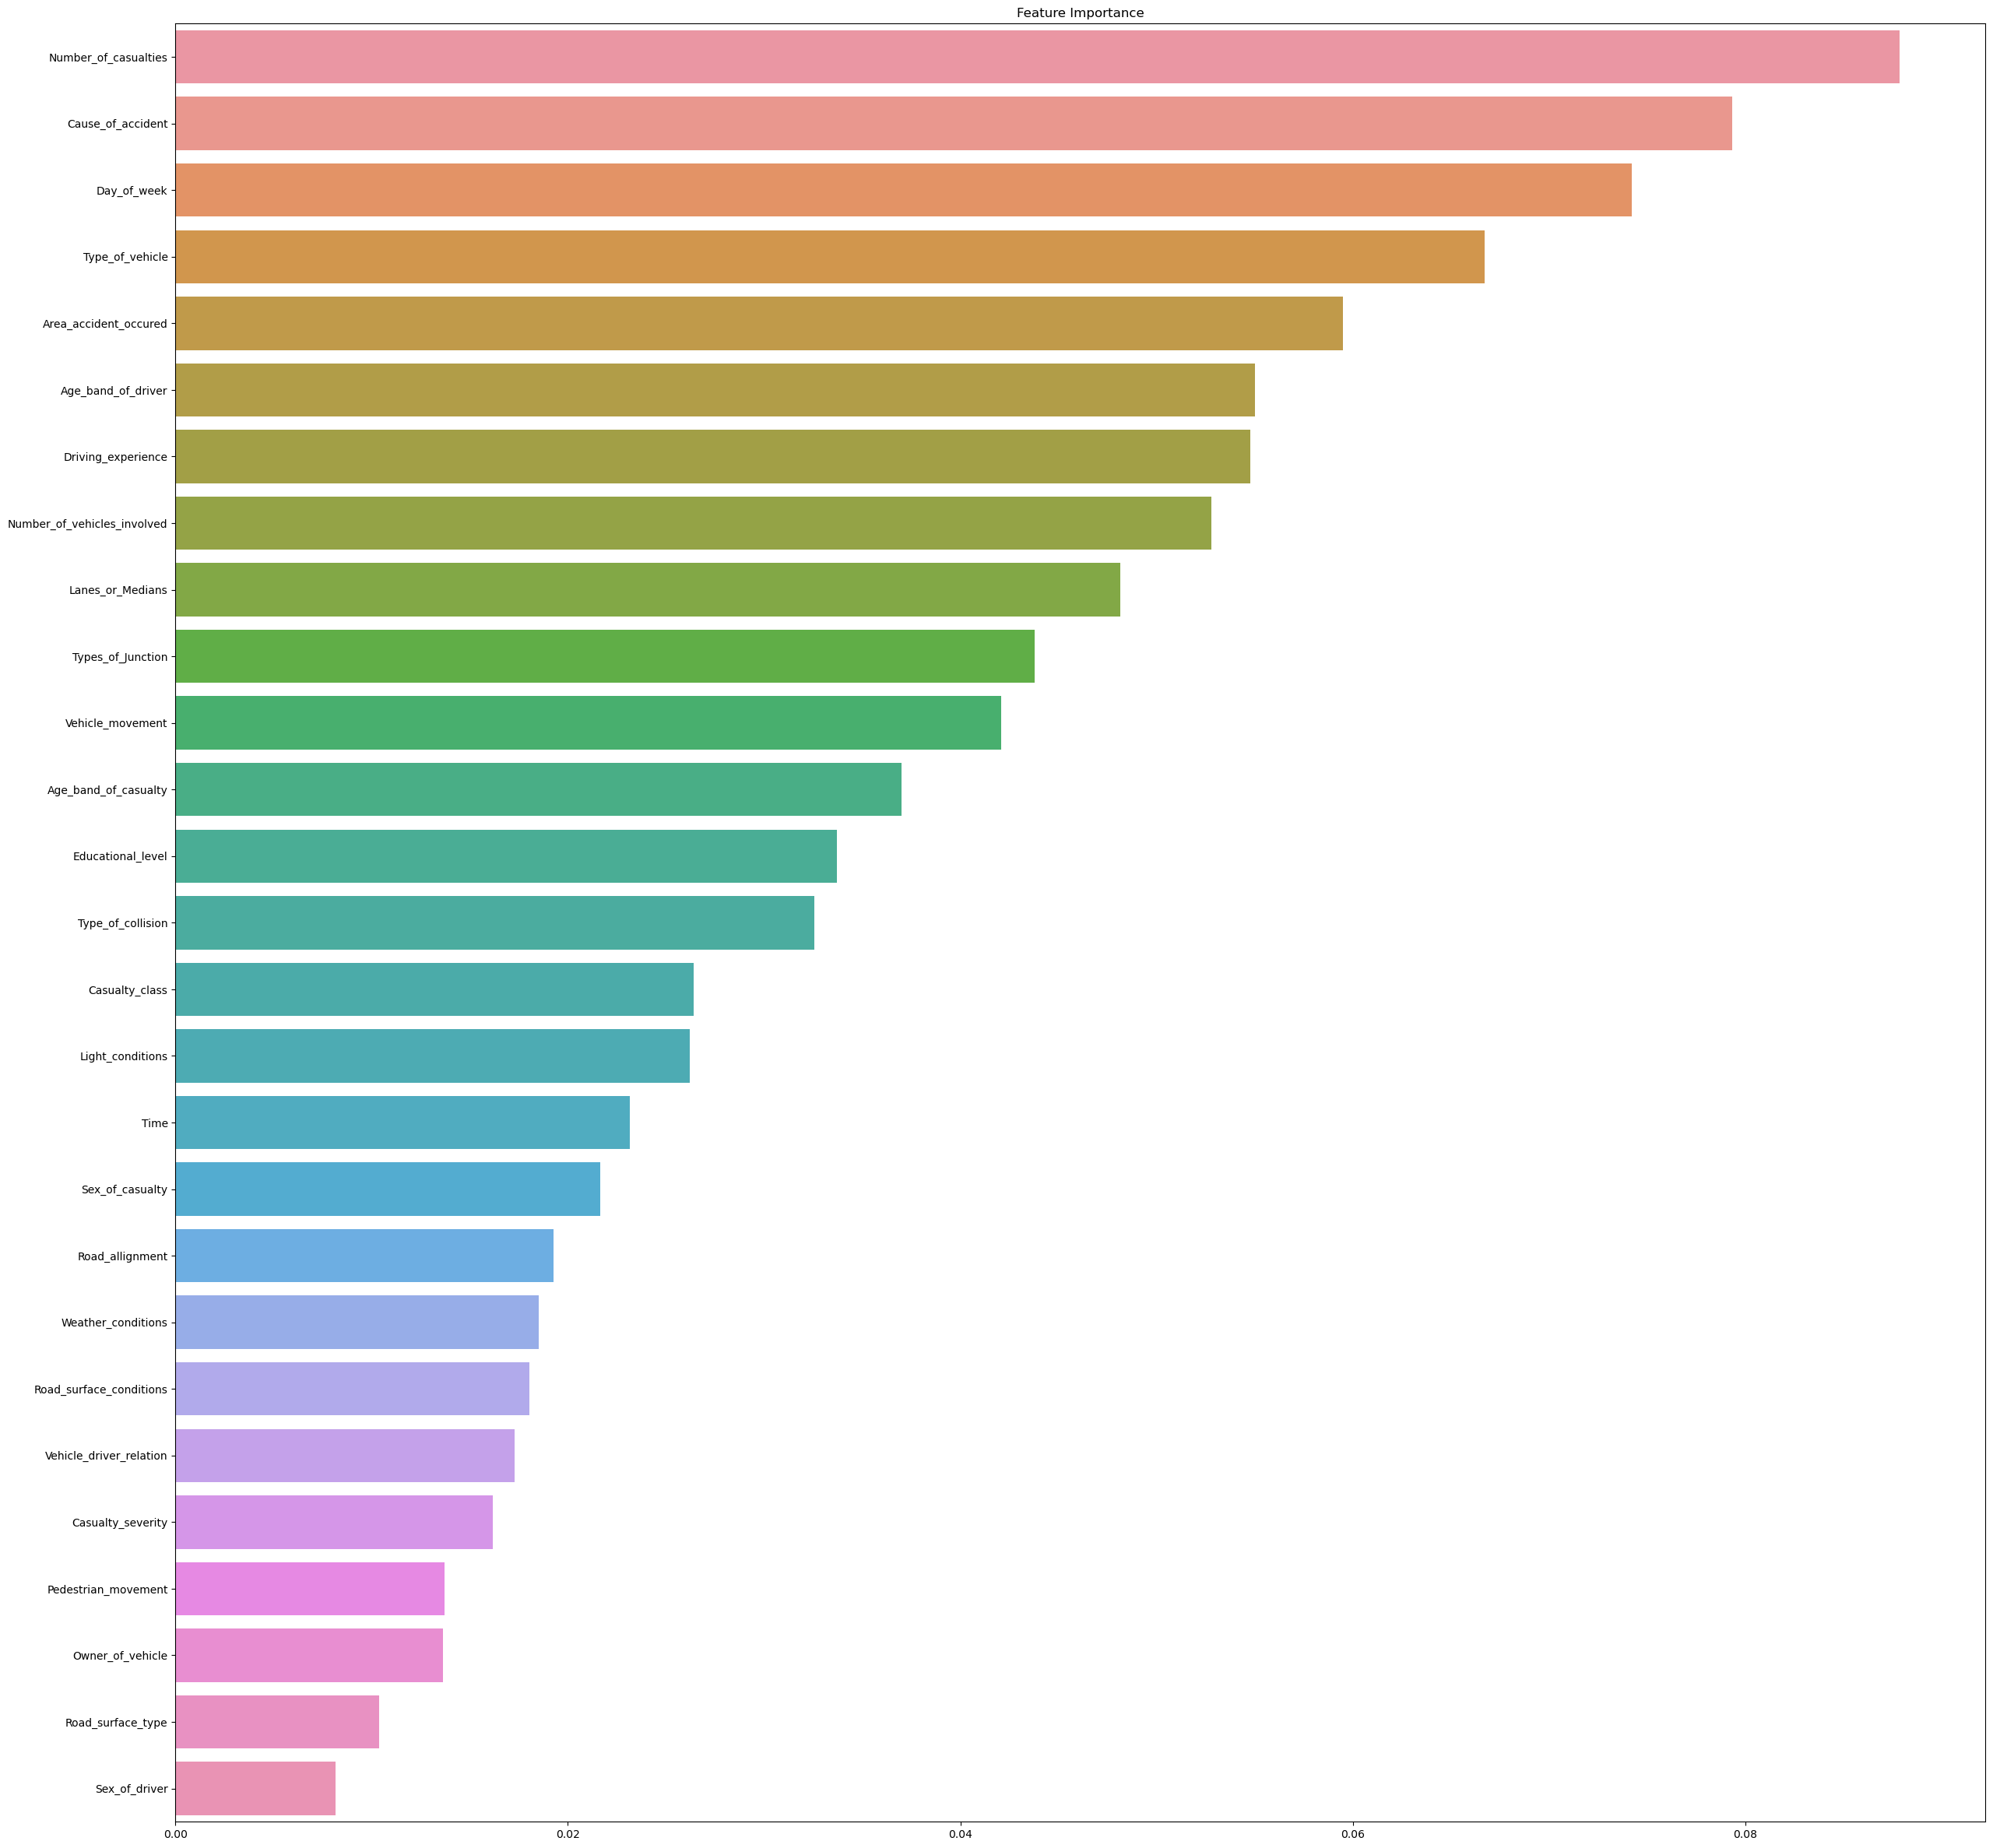

In [79]:
plt.figure(figsize=(30,30))
Feature_importance_rt = pd.Series(data = rt_model_3.feature_importances_,
                               index=X_train.columns).sort_values(ascending=False)
plt.title("Feature Importance")
sns.barplot(y=Feature_importance_rt.index,x=Feature_importance_rt.values,orient ='h')

In [80]:
new_X_train = ['Day_of_week','Time','Number_of_casualties', 'Light_conditions',  'Age_band_of_driver',
       'Educational_level',  'Driving_experience', 'Number_of_vehicles_involved',
       'Type_of_vehicle',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_conditions',
       'Type_of_collision',

       'Vehicle_movement',

       'Cause_of_accident']

In [81]:
new_X_train = X_train[['Day_of_week', 'Cause_of_accident','Number_of_casualties', 'Number_of_vehicles_involved', 'Light_conditions',  'Age_band_of_driver','Educational_level', 'Driving_experience',
       'Type_of_vehicle', 'Lanes_or_Medians',  'Types_of_Junction','Road_surface_conditions', "Area_accident_occured",'Type_of_collision']]
new_X_test = X_test[['Day_of_week',  'Cause_of_accident','Number_of_casualties', 'Number_of_vehicles_involved', 'Light_conditions',  'Age_band_of_driver','Educational_level', 'Driving_experience',
       'Type_of_vehicle', 'Lanes_or_Medians', 'Types_of_Junction','Road_surface_conditions', "Area_accident_occured",'Type_of_collision']]
new_X_train


,Day_of_week,Cause_of_accident,Number_of_casualties,Number_of_vehicles_involved,Light_conditions,Age_band_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Lanes_or_Medians,Types_of_Junction,Road_surface_conditions,Area_accident_occured,Type_of_collision
2268,6,2,1,2,4,5,5,3,15,5,8,1,8,3
7854,1,8,1,2,4,1,5,3,13,5,2,1,10,9
8060,2,11,1,4,4,2,2,5,15,3,8,1,7,9
6586,3,6,1,3,4,1,5,3,8,7,1,1,3,2
676,6,11,1,2,4,4,2,2,9,3,1,1,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3634,6,11,1,1,4,2,5,1,1,3,1,1,7,9
49,2,1,1,2,4,1,3,2,1,5,1,1,8,9
5467,4,19,1,2,4,5,5,2,1,3,2,1,8,3
7917,7,15,1,2,1,1,5,1,6,3,1,1,10,9


In [89]:
rt_reduced = RandomForestClassifier(ccp_alpha=0.0,
                                        criterion='gini',
                                        max_depth=35,
                                        min_samples_split=2,
                                        n_estimators=900,
                                        class_weight ='balanced')
rt_reduced.fit(new_X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=35, n_estimators=900)

In [90]:
y_pred = rt_reduced.predict(new_X_test)
model_evaluation(rt_reduced,y_test,y_pred)

,Metrics,Score
0,Accuracy,0.847632
1,Precision,0.842902
2,Recall,0.847632
3,F1_score,0.780587


<Axes: title={'center': 'Feature Importance'}>

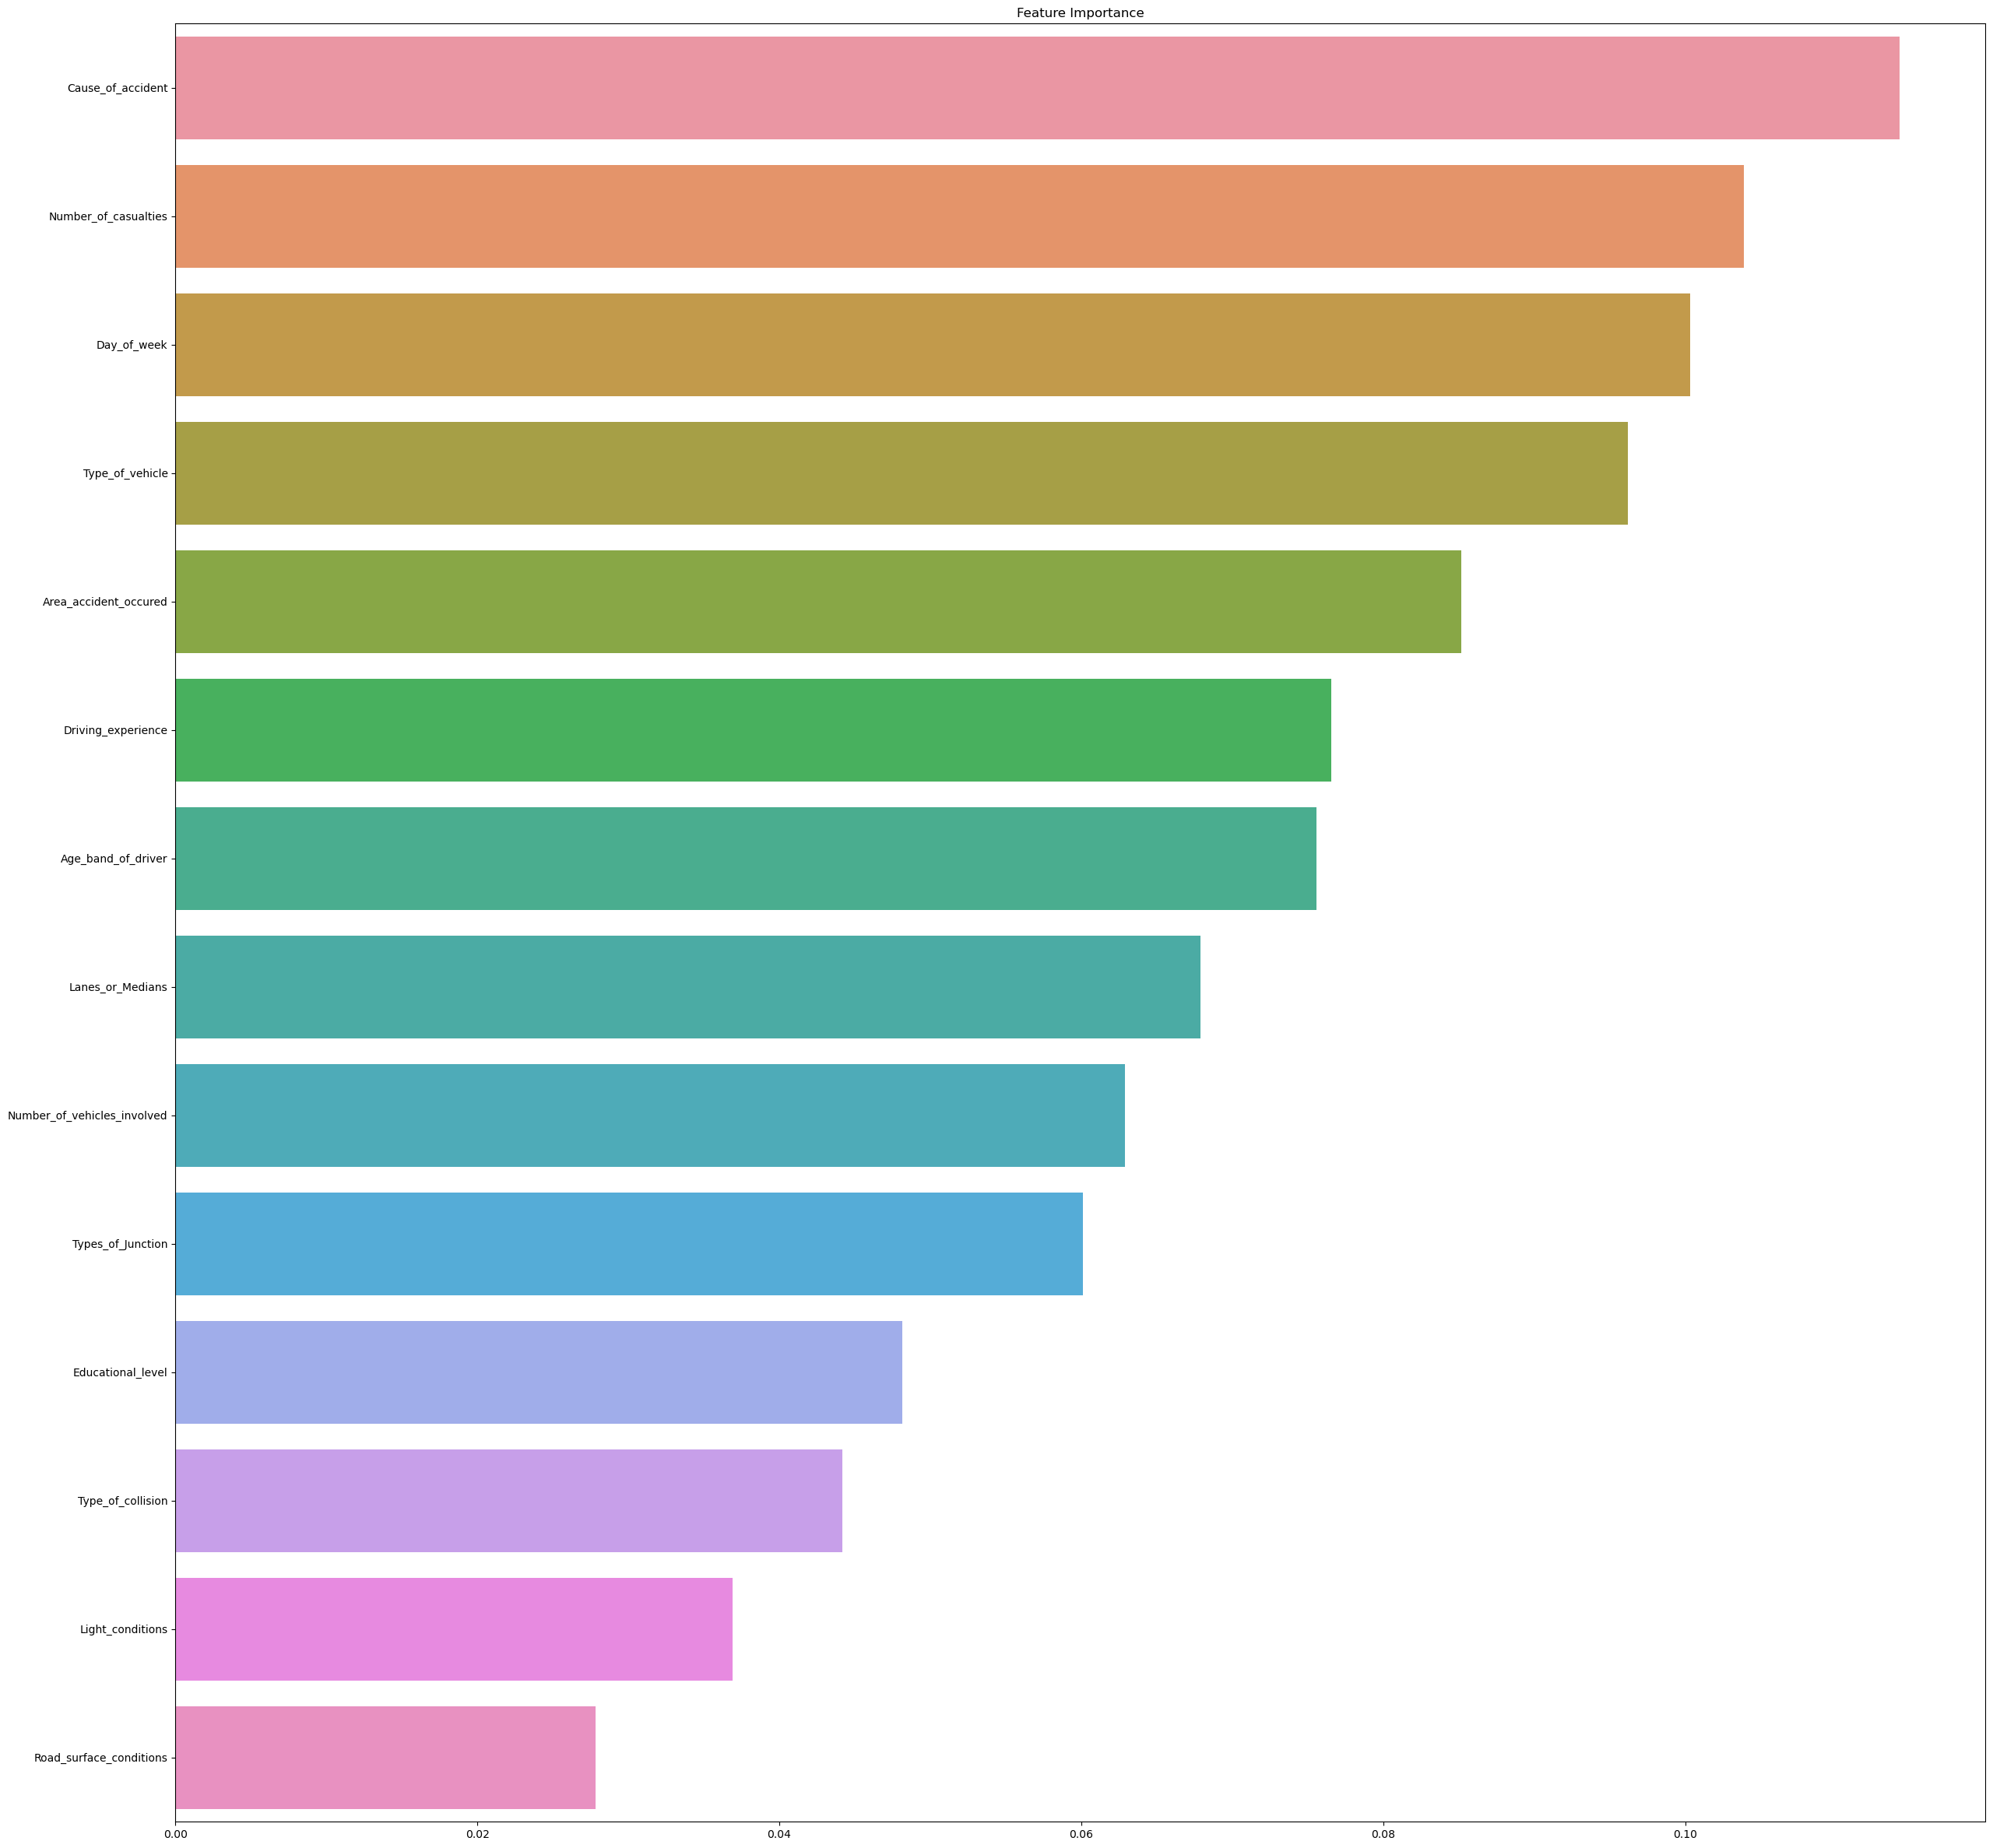

In [91]:
plt.figure(figsize=(30,30))
Feature_importance_rt = pd.Series(data = rt_reduce.feature_importances_,
                               index=new_X_train.columns).sort_values(ascending=False)
plt.title("Feature Importance")
sns.barplot(y=Feature_importance_rt.index,x=Feature_importance_rt.values,orient ='h')

In [92]:
filename = 'rt_reduced.joblib'
joblib.dump(rt_reduced, open(filename, 'wb'),compress=3)

In [93]:

import sys
sys.getsizeof(rt_reduced)

48

In [94]:
import sklearn
import numpy
import pandas
#import pillow
import scipy
import joblib
